# Introduction to Data Analysis
The second main topic of this course is Data Analysis. We first talk about some basic steps of data analysis and what a bit about what those steps involve. In this notebook, I do not plan to explain all the details of how to execute this process in pandas, only use pandas to showcase that the functionality exists in pandas.
## Fundamentals of Data analysis
The following diagram depicts a common workflow for data analysis.  

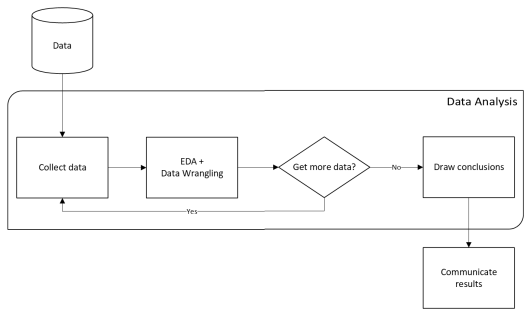

*Image credits: (Molin, 2019)*

### Data Collection
The first step in any data analysis process should be data collection. There are many sources from which to collect data. These different sources will also take different formats. Some questions you will have to ask yourself are 
- What questions am I trying to answer? 
- Who has the data that can answers those questions?
- How was the data collected? 
- What kind of changes need to be made to fit my needs?
- How do I access The

Answering these questions will help you determine what data to access and how to gather it.

Once your at the step of actually gathering the data, python has a variety of tools to get that data into your code. For web scraping (e.g. pulling tables from html pages like wiki sites) you have libraries like `requests` and `beautifulsoup`. Querying Databases can be performed using database specific packages, `SQLAlchemy` or even `pandas`. The `requests` library is also useful when receiving data from from an Application Programming Interface (API). Sometimes, you will simply find the data you need as a downloadable file (commonly a `csv` filetype). 

Let's show an example by downloading some COVID-19 data made available by the [New York Times (2021)](https://github.com/nytimes/covid-19-data).

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
table = pd.read_csv(url)
table

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
46201,2022-06-15,Virginia,51,1830122,20448
46202,2022-06-15,Washington,53,1625847,13131
46203,2022-06-15,West Virginia,54,524432,7016
46204,2022-06-15,Wisconsin,55,1703203,14711


It is also important to read whatever documentation that comes with your data. For example, the source hosts data at different geographic resoutions ranging from individual counties all the way up to country-wide. We'll take the state as I don't need such a fine grain, but I would like to compare some of the different regions in the United States. It might be important to read up on how they did their counting, or what the different columns mean. This data would be critical in helping me answer the questions I mentioned above.

### Data Wrangling
Data Wrangling or Data Cleaning is the process of taking the data from an unusable form into one that you can start to answer questions with. This is one of the most critical steps for 2 major reasons. 
1. It is very likely that you will *not* find the perfect data set that is ready for your use the moment you pick it up. You will likely have to do some reformatting, filtering, or aggregating to get the data to a state in which is is ready to be used for your specific use case. Remember that someone else has likely gathered the data (especially when working at Summit) and had different needs when they gathered the data. 
2. Many things can happen when collecting (or storing) the data. Human error can cause typos to be recorded in place of the real value. Values may be missing for optional questions on surveys. Unconventional formats may have been used even if the data is correct. All of these things need to be corrected. 
Even though it may be one of the least enjoyable parts, data wrangling is an absolutely critical step of the process as it allows for more accurate reporting of the data and the underlying trends that can be found in the data. 

Taking the example above, let's assume that I am only interested in comparing my home state of North Carolina and my current state of Utah. Some cleaning that I might do could involve filtering out any rows that do not report on those two states. 

In [3]:
filter_map = [value in ["North Carolina", "Utah"] for value in table.state]
table = table[filter_map]
table

,date,state,fips,cases,deaths
199,2020-02-25,Utah,49,1,0
208,2020-02-26,Utah,49,1,0
217,2020-02-27,Utah,49,1,0
227,2020-02-28,Utah,49,1,0
237,2020-02-29,Utah,49,1,0
...,...,...,...,...,...
46086,2022-06-13,Utah,49,962441,4793
46129,2022-06-14,North Carolina,37,2801471,25104
46142,2022-06-14,Utah,49,962441,4793
46185,2022-06-15,North Carolina,37,2824770,25150


I also don't need the column `fips` because I will not be connecting this table to any other dataset for this analysis, so we can dro pthat column. 

In [8]:
# table = table.drop("fips", axis=1)
table

,date,state,cases,deaths
199,2020-02-25,Utah,1,0
208,2020-02-26,Utah,1,0
217,2020-02-27,Utah,1,0
227,2020-02-28,Utah,1,0
237,2020-02-29,Utah,1,0
...,...,...,...,...
46086,2022-06-13,Utah,962441,4793
46129,2022-06-14,North Carolina,2801471,25104
46142,2022-06-14,Utah,962441,4793
46185,2022-06-15,North Carolina,2824770,25150


### Exploritory Data Analysis
Our human brains are very much designed to take in visual data. Plotting the data in some way is a critical part in the data clensing and preperation process. No matter how hard we try, a spacial representations of data will always be much more meaningful to us than raw numbers in a box. 


Depending on the data, you may get clues that more data is needed, that more cleaning need to be done, or that maybe you need to undo some processes previously believed necessary. Much like every other part of data processing, the answer to these questions will depend on the exact dataset that is being used for a project.

For our example, let's plot the data as a time graph for the two states. 

In [9]:
grouped_data = table.groupby("state")

In [10]:
grouped_data.get_group("North Carolina")

,date,state,cases,deaths
277,2020-03-03,North Carolina,1,0
294,2020-03-04,North Carolina,1,0
314,2020-03-05,North Carolina,1,0
339,2020-03-06,North Carolina,2,0
370,2020-03-07,North Carolina,2,0
...,...,...,...,...
45961,2022-06-11,North Carolina,2801017,25104
46017,2022-06-12,North Carolina,2801017,25104
46073,2022-06-13,North Carolina,2801365,25104
46129,2022-06-14,North Carolina,2801471,25104


In [11]:
grouped_data.get_group("Utah")

,date,state,cases,deaths
199,2020-02-25,Utah,1,0
208,2020-02-26,Utah,1,0
217,2020-02-27,Utah,1,0
227,2020-02-28,Utah,1,0
237,2020-02-29,Utah,1,0
...,...,...,...,...
45974,2022-06-11,Utah,962441,4793
46030,2022-06-12,Utah,962441,4793
46086,2022-06-13,Utah,962441,4793
46142,2022-06-14,Utah,962441,4793


In [12]:
import matplotlib.pyplot as plt

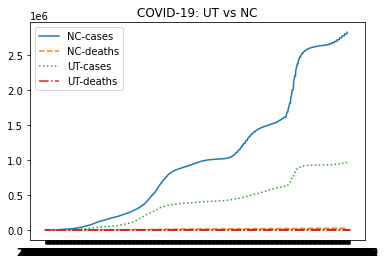

In [13]:
fig = plt.figure()
plt.title("COVID-19: UT vs NC")
plt.plot(
    grouped_data.get_group("North Carolina").date,
    grouped_data.get_group("North Carolina").cases,
    linestyle="solid", 
    label="NC-cases"
)
plt.plot(
    grouped_data.get_group("North Carolina").date,
    grouped_data.get_group("North Carolina").deaths, 
    linestyle="dashed",
    label="NC-deaths"
)
plt.plot(
    grouped_data.get_group("Utah").date, 
    grouped_data.get_group("Utah").cases, 
    linestyle="dotted", 
    label="UT-cases"
)
plt.plot(
    grouped_data.get_group("Utah").date, 
    grouped_data.get_group("Utah").deaths, 
    linestyle="dashdot", 
    label="UT-deaths"
)
plt.legend()
plt.show()

So, the next thing I would do after looking at this graph is plot it again. Notice the Y-Axis. Clearly, these four observations do not belong next to each other. the number of cases have absolutely skyrocketed in the past amount of time, leaving deaths in the absolute dust. If we want to have a good visual comparson, we absolutely need to separate these graphs further. 

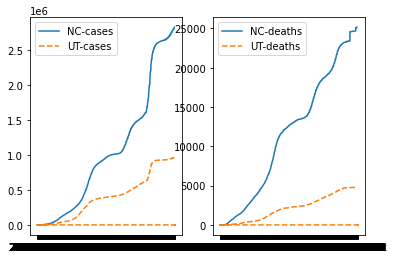

In [14]:
fig = plt.figure()
plt.title("COVID-19: UT vs NC")
plt.subplot(121)
plt.plot(
    grouped_data.get_group("North Carolina").date, 
    grouped_data.get_group("North Carolina").cases, 
    linestyle="solid",
    label="NC-cases"
)

plt.plot(
    grouped_data.get_group("Utah").date, 
    grouped_data.get_group("Utah").cases, 
    linestyle="dashed",
    label="UT-cases"
)

plt.legend()
plt.subplot(122)
plt.plot(
    grouped_data.get_group("North Carolina").date, 
    grouped_data.get_group("North Carolina").deaths,
    linestyle="solid",
    label="NC-deaths"
)

plt.plot(
    grouped_data.get_group("Utah").date,
    grouped_data.get_group("Utah").deaths, 
    linestyle="dashed", 
    label="UT-deaths"
)

plt.legend()
plt.show()

While each graph is much easier to read, we have still run into some other issues. Notice that the graphs for North Carolina are significantly higher than that of Utah. I want to point out again the scales on on the Y-Axis again. Placing these two graphs side now seems to imply that the number of cases and deaths are rising at similar rates, even though the numbers are clearly printed on the sides. While graphs can offer a very quick and intuitive sense of what the data is doing, you (as a data analyst or presenter) must be causious about what the picture is saying about your data. You can very quickly lead others (or even yourself) to certain conclusions that may not be completely acurate, even though the numbers themselves are true. 

This is why visualizing the data before actually performing anaysis is critical. It will help you determine what types of analysis needs to be performed, if any further cleaning or normalizing should be performed, if more data needs to be collected simply by being able to look at the data. 

For example, this graphic tells me that I should probably consider scaling these numbers by the total population of the respective states (North Carolina as over three times as many people as Utah). It tells me that I might need to find some Census data to find an accurate measurement of the population for each state.

One thing that I'm not worried about at this step however is how terrible my graphic looks. I recognize that this is simply a quick plot of the data. There are a lot of issues in design and acessability that would need much more work before this is presentable.

*Note: I have used MatPlotLib as the plotting libary in this example because that is what I'm most immedietly comfortable with, as that is what I was first taught. Pandas actually has plotting cabability stored as a method in the dataframe object. Do not feel the need to take full control over the graphics as I have done above. Simpler, less scary ways exist.*

### Drawing Conclusions
After iteratively collecting, cleaning, and preparing the data, we can finally reach the point where we start to ask questions about the data. Questions like 
- Do we notice any patterns or relationships in the data?
- Can we make accurate predictions using the data? 
- What kind of distributions do we see? 
- What kind of insights can we draw from the data (if any at all)?

Not all of these questions will be applicable, and sometimes, none of your questions can be answered at the current state. Having these questions in mind will help you determine what the next steps should be. Questions like 
- Should we build some sort of model for the data? 
- Do we need to collect more data?
- Do we need to drop this project and more to something else?

can be considered and answered at this point. 

## Closing Thoughts
Unfortunitely most of the work around data analysis will involve iterating over the data, preparing it before you can really do anything with it. Following the 80-20 rule that seems to loom over all that what we do, 80% of the work will be the preperation, and the last 20% will be the good stuff, where you can actually start to learn things about the data. Pandas is an exceptional tool in helping that first 80% run a little bit smoother. 

Citations:
- Molin, S. (2019). Hands-On Data Analysis with Pandas. Packt Publishing Ltd.
- The New York Times. (2021). Coronavirus (Covid-19) Data in the United States. Data added to code on 6/17/2022, from https://github.com/nytimes/covid-19-data.